# Erdös-Rényi random graphs

This notebook presents numerical demonstrations of basic properties of Erdös-Rényi random graphs. We use the [NetworkX](https://networkx.github.io/) Python library to generate our graphs.

Reference: A. Barrat, M. Barthelemy, A. Vespignani: Dynamical Processes on Complex Networks, Cambridge University Press, 2008.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
%matplotlib inline

A random graph with $n$ nodes and expected average degree $K$ is generated using wiring probability $p = K/(n-1)$.

In [2]:
import networkx as nx
import numpy as np

# Define the graph generating function.
def graph(n,K):
    """
    Generate an Erdos-Renyi random graph of n nodes with expected 
    average degree K.
    """
    p = K/(n-1)  # wiring probability
    G = nx.gnp_random_graph(n,p)
    G.K = K  # store the generating parameter K in G
    return G

# Define a function for calculating average degree.
def avgdeg(G):
    """
    Calculate average degree.
    """
    K = 2*G.number_of_edges() / G.number_of_nodes()
    return K

### Basic graph statistics

We study the basic statistics for a single graph.

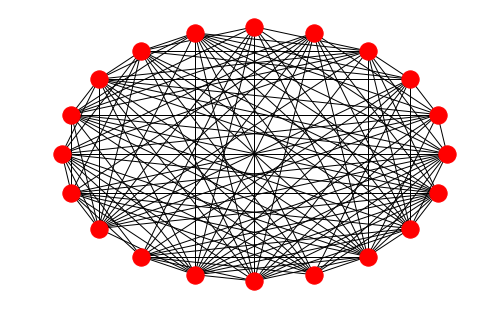

In [3]:
# Set the number of nodes n and expected average degree K
n = 20
K = 12
G = graph(n,K)

# Draw the graph
nx.draw_circular(G)

Expected values of basic graph statistics:
* The expected number of edges is $nK/2$.
* The expected average degree is $K$.
* The expected average clustering coefficient is $K/(n-1)$.
* The expected average shortest path length grows comparably to $\log n \, /\log K $. The derivation of this estimate ignores the effect of cycles, which causes a certain amount of inaccuracy.

In [4]:
print('Number of edges: {}  (Expected: {})'.format(G.number_of_edges(),int(np.round(n*G.K/2))))
print('Average degree: {:.1f}  (Expected: {:.1f})'.format(avgdeg(G), G.K))
print('Average clustering coefficient: {:.2f}  (Expected: {:.2f})'.format(nx.average_clustering(G), G.K/(n-1)))
print('Average shortest path length: {:.2f}  (Expected approximately: {:.2f})'.format(nx.average_shortest_path_length(G), np.log(n)/np.log(G.K)))

Number of edges: 134  (Expected: 120)
Average degree: 13.4  (Expected: 12.0)
Average clustering coefficient: 0.70  (Expected: 0.63)
Average shortest path length: 1.29  (Expected approximately: 1.21)


We will then plot the degree histogram.

Text(0,0.5,'Number of nodes')

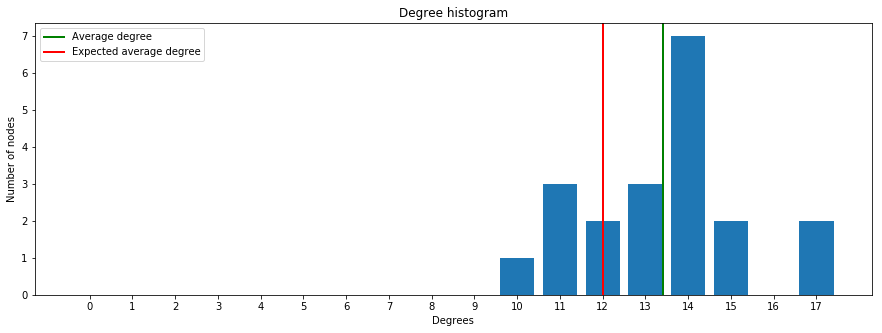

In [5]:
hist = nx.degree_histogram(G)
degs = range(len(hist))

plt.figure(figsize=(15,5))
plt.bar(degs, hist)

ad = avgdeg(G)
avgdegline = plt.axvline(ad, color = 'g', linewidth = 2)
expavgdegline = plt.axvline(G.K, color ='r', linewidth = 2)
plt.legend([avgdegline, expavgdegline], ['Average degree', 'Expected average degree'], loc=2)

plt.xticks(degs)
plt.title('Degree histogram')
plt.xlabel('Degrees')
plt.ylabel('Number of nodes')

### Asymptotic behaviour of the degree distribution

For an Erdös-Rényi random graph with $n$ nodes and wiring probability $p$, the expected degree distribution is given by the binomial distribution
$$
  \binom{n-1}{k} \, p^k \, (1-p)^{n-1-k}, \quad 0 \leq k \leq n-1.
$$
For large $n$, this can be approximated by the Poisson distribution 
$$
  \frac{\exp(-K) K^k}{k!}, \quad k > 0,
$$
when $K = pn$ stays fixed. We will demonstrate this next.

In [6]:
# Define a function for plotting the different distributions

def plotdegdist(G):
    """
    A utility function for plotting degree distributions.
    """
    n = G.number_of_nodes()
    K = G.K
    p = K/(n-1)
    hist = nx.degree_histogram(G)
    N = len(hist) + 5
    
    plt.figure(figsize=(15,5))
    
    # expected degree distribution
    bm = [binom.pmf(k,n-1,p) for k in range(N)]
    plt.bar(np.array(range(N)), bm, label='expected degree distribution (binomial)')

    # Poisson approximation
    po = [poisson.pmf(k, K) for k in range(N)]
    plt.bar(np.array(range(N)) + 0.1, po, label='approximating distribution (Poisson)')
    
    # actual degree distribution
    dist = [k/n for k in hist] + 5 * [0]
    plt.bar(np.array(range(N)) - 0.1, dist, label='actual degree distribution')

    M = 1.05 * max(dist + bm + po)

    plt.xticks(range(N))
    plt.ylim(0,M)
    plt.title('Degree distribution of a graph with n={} and K={}'.format(G.number_of_nodes(), K))
    plt.xlabel('Degrees')
    plt.ylabel('Ratio of nodes')
    plt.legend(loc=1)

<Figure size 432x288 with 0 Axes>

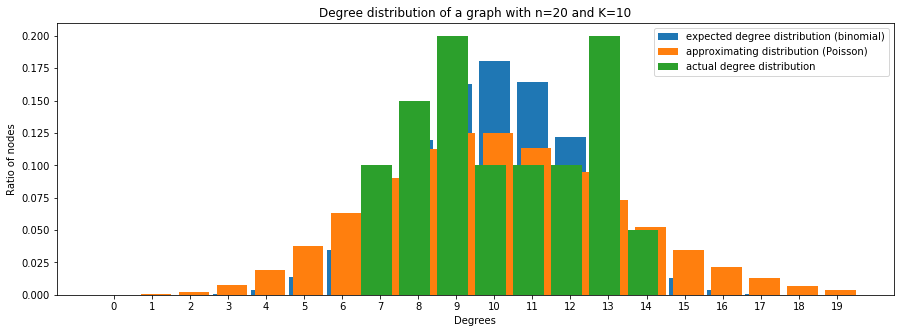

<Figure size 432x288 with 0 Axes>

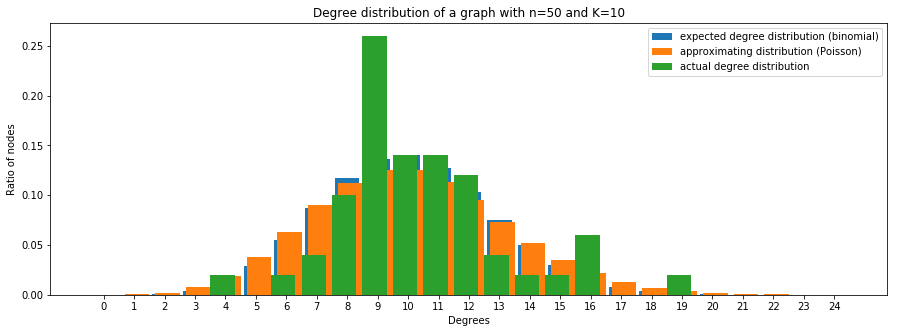

<Figure size 432x288 with 0 Axes>

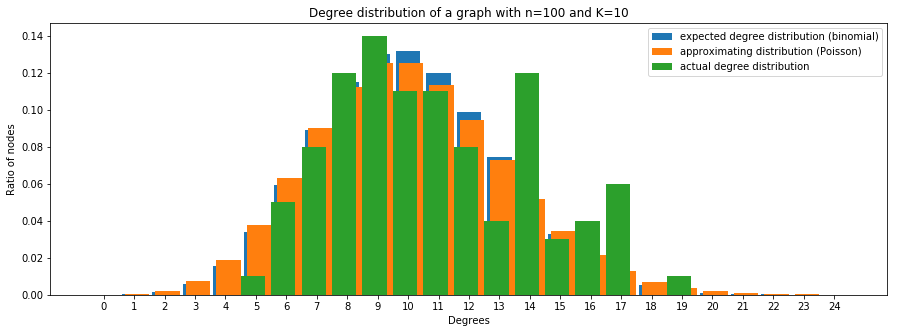

<Figure size 432x288 with 0 Axes>

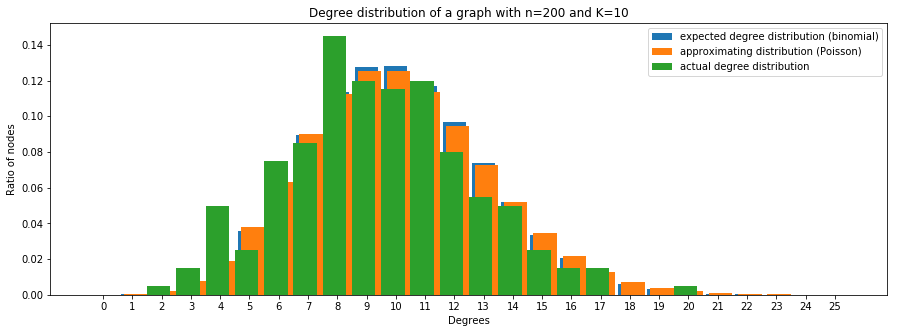

<Figure size 432x288 with 0 Axes>

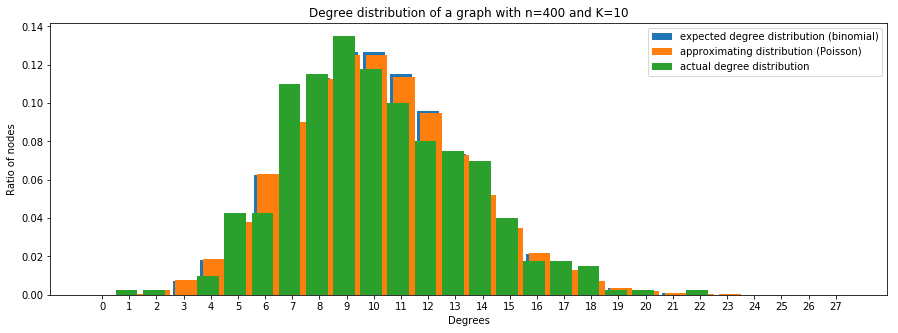

<Figure size 432x288 with 0 Axes>

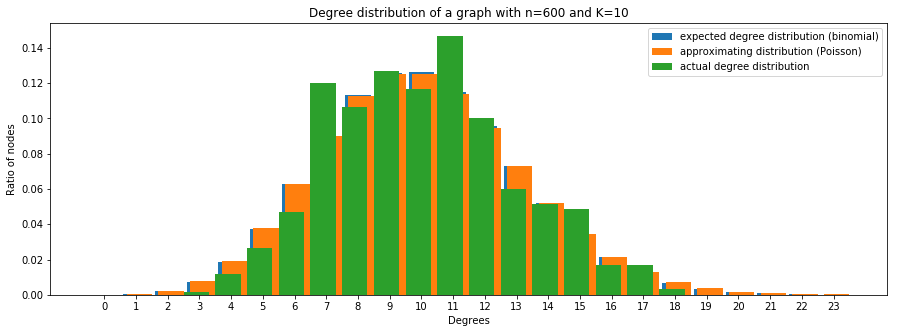

In [7]:
# fix K
K = 10
graphs = []
for i in [2,5,10,20,40,60]:
    n = int(i*K)
    graphs.append(graph(n,K))

# plot the degree distributions
for G in graphs:
    plt.figure()
    plotdegdist(G)

We see that the Poisson distribution approximates the binomial distribution very accurately for larger $n$. The actual degree distribution fluctuates around the expectation somewhat more.